<a href="https://colab.research.google.com/github/nssn96/ML_Neural-networks/blob/main/ML_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Assignment 2 - Neural Networks


1.   Author : Surya Narayanan Nadhamuni Suresh
2.   UTA ID : 1001877873



In [12]:
#import lines
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [13]:
#References Used
#https://towardsdatascience.com/https-medium-com-piotr-skalski92-deep-dive-into-deep-networks-math-17660bc376ba
#https://towardsdatascience.com/lets-code-a-neural-network-in-plain-numpy-ae7e74410795

# This is the Layer class

class Layer:

  def initial_w_bias(self,nn,value=90):
    
    #random seed initiation
    np.random.seed(value)
    n_layers = len(nn)
    param = dict()

    for index,layer in enumerate(nn):
      layer_num = index+1
      lyr_inputsize = layer['d_input']
      lyr_outputsize = layer['d_output']

      #creating the values for the w and bias matrix
      param['w'+str(layer_num)] = np.random.randn(lyr_outputsize,lyr_inputsize) * 0.1
      param['b'+str(layer_num)] = np.random.randn(lyr_outputsize,1) * 0.1

    
    return param


  def forward(self):
    pass


  def backward(self):
    pass



In [14]:
# This is the Linear layer class

class Linearlayer(Layer):

  # def forward_single(self,w,bias,prev_out,activ='tanh_forwardprop'):
  #   # Z_mat--> the input matrix calculation which will be passed in the activation function
  #   Z_mat = np.dot(w,prev_out)
  #   return activ(Z_mat),Z_mat # we are returning the calculated z value here because we need the z-value during backward pass calculation

 #this is the full forward function to calculate whole step forward which will make use of forward_single function to eliminate iteration and speed up calculation 
  def forward(self, data, param ,nn):
    backup=dict() # to store info required for the backward calculation
    A_current = data # the input data is the activation for layer 0 ie the input layer

    #traversing over the layers in the neural network
    #this is the same steps that we used to assign the weights and bias for network
    for index,lyr in enumerate(nn):
      lyr_num = index+1
      #just assigning the previous A value for the calculation of next Z value, since the output of layer(l-1) is the input for layer l
      A_before = A_current
      # getting the w and bias values from param for sending it to single forward function
      w = param['w'+str(lyr_num)]
      bias = param['b'+str(lyr_num)]
      activ = lyr['activation']

      #calculation of activation value A for the current layer
      # A_current, Z_current = self.forward_single(w,bias,A_before)

      # Z_mat--> the input matrix calculation which will be passed in the activation function
      Z_mat = np.dot(w,A_before) + bias
      backup['Z'+str(lyr_num)] = Z_mat
      A_current = self.activ(Z_mat)
      #storing the values for backward pass calc
      backup['A'+str(index)] = A_current
      

      return A_current,backup



  def backward_single(self):
    pass
#in backward pass we use the recursive use of a chain rule
  def backward(self,y_pred,y,backup,param,nn):
    deriv_values=dict()  #dictionary to store the derivative values

    n = y.shape[1] # count of examples
    y = y.reshape(y_pred.shape) #reshaping it accordingly

    #calculating the derivative of loss w.r.t to prediction vector ie the result of the forward pass
    dA_before = - (np.divide(y,y_pred) - np.divide( 1-y, 1-y_pred))

    for index,lyr in reversed(list(enumerate(nn))):
      lyr_num = index+1
      activ = lyr['activation']
      if activ is 'tanh_forwardprop':
        activ= 'tanh_backprop'
      elif activ is 'sigmoid_forwardprop':
        activ='sigmoid_backprop'
      


      dA_current = dA_before
      A_previous = backup['A'+str(index)]
      z_current = backup['Z'+str(lyr_num)]
      w = param['w'+str(lyr_num)]
      bias = param['b'+str(lyr_num)]

      #calculating the derivative function of the activation function
      dZ_current = activ(dA_current,z_current)

      #calculating the required terms in the chain rule

      #derivative of the weight matrix
      dw = np.dot(dZ_current,A_previous) / (A_previous.shape[1])
      
      #serivative of the A-previous matrix
      dA_previous= np.dot(dw.T,dZ_current)
      
      #derivative of the bias matrix
      dbias = np.sum(dZ_current, axis=1, keepdims= True) / (A_previous.shape[1])

      #storing the derivative values
      deriv_values['dw'+str(lyr_num)] = dw
      deriv_values['db'+str(lyr_num)] = dbias

      return deriv_values

    def update_param(param,deriv_values,nn,alpha):
      # to iterate over the whole network to update the w,bias values
      for index,lyr in enumerate(nn):
        lyr_num = index+1
        param['w'+str(lyr_num)] -= alpha * deriv_values['dw'+str(lyr_num)]
        param['b'+str(lyr_num)] -=alpha * deriv_values['db'+str(lyr_num)]
      
      return param







  

In [15]:
# This is the class for entropy loss

class entropy_loss(Layer):

  def cross_entropy_forward(y_pred,y):
    return -y * np.log(y_pred)
  
  def cross_entropy_backward(y_pred,y):
    return y-y_pred

In [16]:

#This is the class for the sigmoid function

class sigmoid_activation(Layer):

  def sigmoid_forwardprop(self,Z):
   return 1/(1+np.exp(-Z))
  
  def sigmoid_backprop(self,dA,z):
    value = self.sigmoid(z)
    return dA * value * (1-value)

  

In [17]:
#This is the class for the hyperbolic tangent functions

class htangent_activation(Layer):

  def tanh_forwardprop(self,z):
    #2/(1 + e-2x) - 1
    return (2/(1+np.exp(-2*z)) -1)
  
  def tanh_backprop(self,dA,z):
    value = self.tanh_forwardprop(z)
    return dA * value * (1-value)


In [18]:
#This is the class for the softmax function

class softmax_activation(Layer):

  def softmax_forwardprop(self,z):
    return np.exp(z) / sum(np.exp(z))

  
  # def softmax_backprop(self,dA,z):
  #   value = self.softmax_forwardprop(z)
  #   return dA * value * (1-value)

  
  #Yet to edit this--- DONT FORGET+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
  def sigmoid_backprop(probs, bp_err):
    dim = probs.shape[1]
    output = np.empty(probs.shape)
    for j in range(dim):
        d_prob_over_xj = - (probs * probs[:,[j]])  # i.e. prob_k * prob_j, no matter k==j or not
        d_prob_over_xj[:,j] += probs[:,j]   # i.e. when k==j, +prob_j
        output[:,j] = np.sum(bp_err * d_prob_over_xj, axis=1)
    return output
  

  

In [19]:
#This part of the code is for sequential class

class Sequential(Layer):

  def addlayer(self,d_input,d_output,activation,nn):
    nn.append({'d_input':d_input ,'d_output':d_output, 'activation': activation })
    return nn

  def train(self,data,target,steps,alpha,nn,verbose=False):
    #creating the weights and bias matrix
    param = self.initial_w_bias(nn,2)

    #a list  to store the calculated loss in each iteration
    loss_arr=[]

    #iterating the network depending on the step value

    for i in range(steps):

      #forward step calculation
      y_pred,backup = self.forward(data,param,nn)

      #calculating the loss and adding them to list
      loss = self.cross_entropy_forward(y_pred,target)
      loss_arr.append(loss)

      #calculating the gradient ie backward loss
      deriv_values = self.backward(y_pred,target,backup,param,nn)

      #updating the parameter values
      param = self.update_param(param,deriv_values,nn,alpha)

      if(i % 50 ==0):
        if verbose:
           print("Iteration: {:05} - loss_value: {:.5f}".format(i, loss))
    
    return param


In [20]:
# I will be providing the a list of dictionary that contains the parameters for the Neural network( ie the number of layers, number of nodes and activation function)
#d_input--> size of the input vector to the layer ie n(l-1) where l is layer
#d_ouput--> size of the activation vector at the output of the layer ie n(l)
# nn = [
#       {'d_input':2 ,'d_output':3, 'activation': 'tanh_forwardprop' } ,
#        {'d_input':3 ,'d_output':1, 'activation': 'sigmoid_forwardprop' }
# ]
nn=[]


In [21]:
# testing to add new layers
net = Sequential()
param = net.initial_w_bias(nn)
nn = net.addlayer(2,3,'tanh_forwardprop',nn)
nn = net.addlayer(3,1,'sigmoid_forwardprop',nn)
nn
# #To see the initial weights and bias added
# model = Layer()
# param = model.initial_w_bias(nn)
# param




[{'activation': 'tanh_forwardprop', 'd_input': 2, 'd_output': 3},
 {'activation': 'sigmoid_forwardprop', 'd_input': 3, 'd_output': 1}]

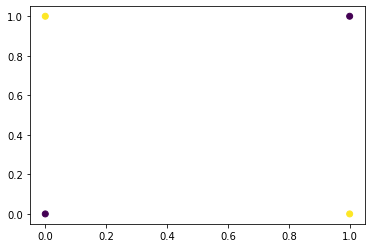

In [22]:
#TESTING the model by solving the XOR problem

#creating the input data for the XOR

data = np.array([[0, 0],
                    [0, 1],
                    [1, 0],
                    [1, 1]])
target = np.array([0, 1, 1, 0])

#plotting the input data
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1], c=target)


